# MachineLearning 01
## Fish_Classification

### Data on Bream

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

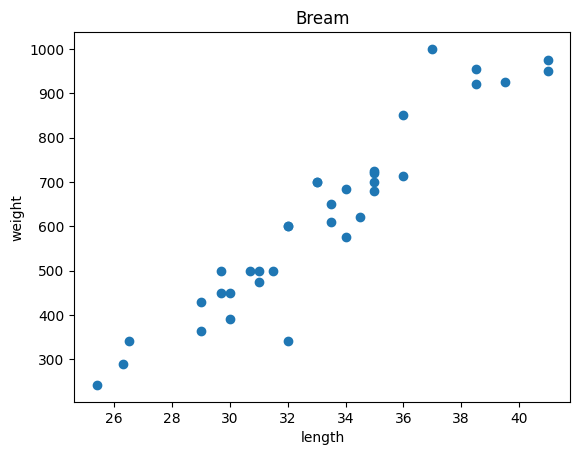

In [3]:
import matplotlib.pyplot as plt
            # For Data Visualization

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Bream')
plt.show()

### Data on Smelt

In [2]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

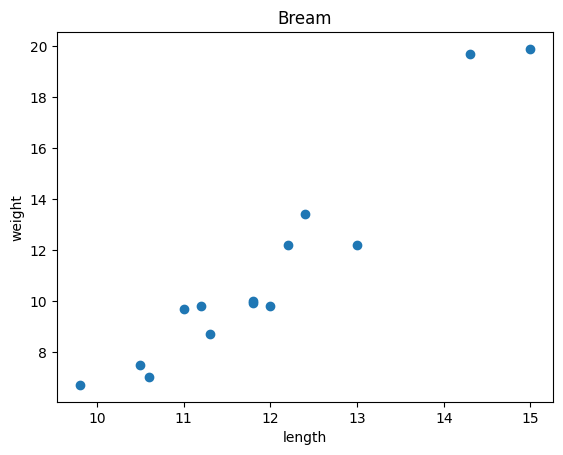

In [4]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Bream')
plt.show()

### First ML Program

* 도미 리스트와 빙어 리스트 합치기

In [6]:
length = bream_length + smelt_length # 도미와 빙어의 '길이' 리스트를 합친 length 리스트 생성.
weight = bream_weight + smelt_weight # 도미와 빙어의 '무게' 리스트를 합친 weight 리스트 생성.

print('length.shape:', len(length)) # 리스트는 len(x) 사용해서 리스트 길이 출력
print('weight.shape:', len(weight)) # 데이터프레임은 x.shape 사용해서 행,열 출력

length.shape: 49
weight.shape: 49


* 각 특성 (length, weight)에 대한 "2차원 리스트" 만들기
    * zip 함수: 나열된 리스트 각각에서 원소를 하나씩 꺼내 반환
    * 리스트 내포 구문을 이용
* **Scikit-learn (sklearn) Package** 사용하기 위함

In [12]:
fish_data = [
             [length, weight] 
             for length, weight in zip(length, weight)
            ]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
49


* 정답 (target) 데이터 만들기
    * 도미 = 1, 빙어 = 0

In [16]:
fish_target = [1] * 35 + [0] * 14

# len(bream_length) = 35
# len(smelt_length) = 14

# 35 마리의 도미 = [1] * 35
# 14 마리의 빙어 = [0] * 14

print(fish_target)
print(len(fish_data))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
49


**Scikit-learn (sklearn) Package**

* **KNeighborsClassifier()**
    * **K-최근접 이웃(KNN, K-Nearest Neighbor) 알고리즘**
    * 가장 간단한 머신러닝 알고리즘
    * 분류 (Classification) 알고리즘
    * 가정: '비슷한 특성을 가진 데이터는 비슷한 범주에 속한다'
    

In [19]:
from sklearn.neighbors import KNeighborsClassifier
    # scikit-learn package에 구현되어 있는 K-NN 알고리즘 클래스 KNeighborsClassifier - import
    
kn = KNeighborsClassifier()
    # 분류 모델의 객체 생성

* Fitting
    * 분류 모델 객체 (kn)에 fish_data, fish_target 전달
    * 도미와 빙어를 분류할 수 있도록 학습 / 훈련
<br><br>
* Scoring
    * 'model.score()' method: 훈련 평가
    * output = 0 ~ 1
    * 1 = 정확성 100
    * 0.5 = 정확성 50

In [20]:
kn.fit(fish_data, fish_target)
print(kn.score(fish_data, fish_target))

1.0


##### 위의 과정은 훈련 셋과 테스트 셋을 분리하지 않음. 훈련시킬 때 사용한 데이터 그대로 테스트해서 나온 결과. <br><br>

- 이미 답을 알고 있는 데이터로 테스트한다면 알고리즘의 성능을 제대로 평가할 수 없다.
- 알고리즘 성능을 제대로 평가하기 위해 Training set - Test set을 분리해야한다.
- Random Sampling 필수 (sampling bias 피하기 위해)

### K-NN 알고리즘 실습 (훈련 셋과 데이터 셋 분리)

##### 이번에는 넘파이 (Numpy)를 이용해 훈련 셋과 데이터 셋을 분리해줄 것이다.

#### Numpy

* Random Sampling
* Python Library 'numpy'
    * 데이터를 섞거나 혹은 골고루 샘플을 뽑아서 훈련 셋과 테스트 셋 만들기
    * 넘파이는 파이썬의 대표적인 배열(array) 라이브러리

In [21]:
import numpy as np # numpy library - import

data_arr = np.array(fish_data) # np.array method (type = ndarray 클래스 객체 - 배열 변환)
    # 리스트 형태의 데이터를 넘파이 배열로 출력
print(data_arr) # 넘파이 배열 특: 가지런한 행 & 열

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [22]:
print(data_arr.shape) # data_arr의 (행, 열) 출력

(49, 2)


In [23]:
target_arr = np.array(fish_target)
print(target_arr)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
print(target_arr.shape)

(49,)


* random sampling
<br><br>
* data_arr [length, weight]
* target_arr [0] or [1]
    * 각 넘파이 배열에서 동일한 인덱스에 대응되는 원소가 같이 선택되어야 함. <br>
**0 ~ 48의 인덱스 중 임의로 35개의 인덱스를 선택한 다음, 해당 인덱스에 해당하는 원소를 뽑아내는 방식으로 훈련 셋을 만들자.**

In [27]:
# random sampling 하기 위해 데이터 섞어주기

np.random.seed(42) # 무작위 결과를 만드는 함수 실행시, 일정한 결과를 얻기 위해 random.seed 설정
index = np.arange(49) # [0, 1, 2, 3, ..., 48]
np.random.shuffle(index) # 도미 - 빙어 순서로 늘어진 리스트를 인덱스 기준으로 섞어준다


In [28]:
print(index) # 인덱스 섞였당. 해당 인덱스에 해당하는 원소를 뽑아낼 수 있게 되었당!

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


넘파이는 배열 인덱싱(Array Indexing)이란 기능을 제공한다. 배열 인덱싱은 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 원소를 선택할 수 있다. 예를 들어 arr[1], arr[3]이 아니라 arr[[1, 3]]처럼 한 번에 선택할 수 있다.
따라서 위의 코드에서 input_arr[index[:35]]는 index[0] ~ index[34]의 값이 인덱스가 되어 선택된 원소들을 배열로 반환한다.


In [33]:
# not neccessary
data_arr[[1,3]] # 넘파이의 배열 인덱싱 기능은 인덱싱 여러 개를 한번에 뽑을 수 있다.
data_arr[[1,2,3]]
data_arr[[13,45,47]]

array([[ 32. , 340. ],
       [ 12.4,  13.4],
       [ 14.3,  19.7]])

In [32]:
# not neccessary
data_arr[index[:3]] # index[0],[1],[2]에 해당하는 원소를 뽑아낸다. 
                    # data_arr[[13, 45, 47]]에 해당하는 원소다.

array([[ 32. , 340. ],
       [ 12.4,  13.4],
       [ 14.3,  19.7]])

In [34]:
train_data = data_arr[index[:35]]
train_target = target_arr[index[:35]]

In [35]:
test_data = data_arr[index[35:]]
test_target = target_arr[index[35:]]

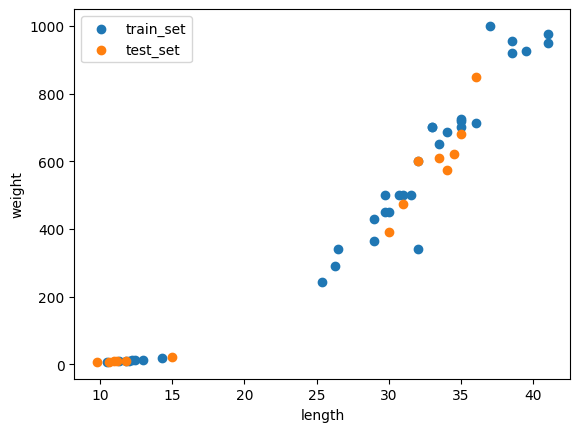

In [39]:
plt.scatter(train_data[:, 0], train_data[:, 1], label = 'train_set')
            # x = 학습 데이터 '길이', y = 학습 데이터 '무게'
plt.scatter(test_data[:, 0], test_data[:, 1], label = 'test_set')
plt.legend(loc = 0)

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

###  Second ML Program

In [41]:
kn = kn.fit(train_data, train_target) # 학습 데이터로 모델 학습한다
kn.score(test_data, test_target)
        # 모델 학습한 객체가 잘 학습되었는지 테스트 데이터와 테스트 타겟을 넣고 정확도를 평가한다.
        # 잘 학습되었다면 output = 1.0

1.0

In [42]:
print(kn.predict(test_data))

# 테스트 데이터로 예측 함수를 사용했을 때 데이터가 빙어의 데이터인지 도미의 데이터인지 예측해줄 것
# 빙어라면 0, 도미라면 1

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [47]:
# 정확하게 평가했는지 테스트 타겟을 보자
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [ ]:
""" 
    print(kn.predict(test_target))
    >>> array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])
    print(test_target)
    >>> array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])
"""

# 동일하므로 알고리즘 성능 확인